# Mathematik für Biologiestudierende II

Sommersemester 2024

07.04.2024

&copy; 2024 Prof. Dr. Rüdiger W. Braun 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()

# Heteroskedastizität

* Die ANOVA vergleicht die Varianzen innerhalb der einzelnen Gruppen mit der Varianz im gesamten Datensatz, um die Unterschiede zwischen den Gruppen zu untersuchen
* À priori geht das erstmal nur, wenn die Varianzen innerhalb der Gruppen gleich sind

* Ein Datensatz ist *heteroskedastisch*, wenn die verschiedenen Gruppen unterschiedlich Varianz haben

# Der Levene-Test

Der Levene-Test testet auf Gleichheit der Varianzen

Beispiel:  Meerschweinchenzähne

* Drei Gruppen von Meerschweinchen, je nach täglicher Gabe an Vitamin C
  * kleine Dosis
  * mittlerer Dosis
  * große Dosis
* Nach 42 Tagen wird die Zahnlänge bestimmt

Quelle: The Statistics of Bioassay

In [2]:
small_dose = np.array([
    4.2, 11.5, 7.3, 5.8, 6.4, 10, 11.2, 11.2, 5.2, 7,
    15.2, 21.5, 17.6, 9.7, 14.5, 10, 8.2, 9.4, 16.5, 9.7
])

medium_dose = np.array([
    16.5, 16.5, 15.2, 17.3, 22.5, 17.3, 13.6, 14.5, 18.8, 15.5,
    19.7, 23.3, 23.6, 26.4, 20, 25.2, 25.8, 21.2, 14.5, 27.3
])

large_dose = np.array([
    23.6, 18.5, 33.9, 25.5, 26.4, 32.5, 26.7, 21.5, 23.3, 29.5,
    25.5, 26.4, 22.4, 24.5, 24.8, 30.9, 26.4, 27.3, 29.4, 23
])

Test auf Heteroskedastizität

In [3]:
stats.levene(small_dose, medium_dose, large_dose)

LeveneResult(statistic=0.6457341109631506, pvalue=0.5280694573759905)

* Der p-Wert ist 0.53.  Hetereskedastizizät kann nicht nachgewiesen werden.

* Wir fahren mit der ANOVA fort

In [5]:
stats.f_oneway(small_dose, medium_dose, large_dose)

F_onewayResult(statistic=67.41573785674247, pvalue=9.532727011699946e-16)

* Gabe von Vitamin C hat Einfluss auf das Zahnwachstum
* Als nächstes würde man eine post-hoc Analyse machen

Anderer Datensatz:

In [15]:
a = np.array([8.88, 9.12, 9.04, 8.98, 9.00, 9.08, 9.01, 8.85, 9.06, 8.99])
b = np.array([8.88, 8.95, 9.29, 9.44, 9.15, 9.58, 8.36, 9.18, 8.67, 9.05])
c = np.array([8.95, 9.12, 8.95, 8.85, 9.03, 8.84, 9.07, 8.98, 8.86, 8.98])
stats.levene(a, b, c)

LeveneResult(statistic=7.584952754501659, pvalue=0.002431505967249681)

# Probleme beim Test auf Heteroskedastizität

* Die Nullhypothese beim Levene-Test ist 

> $H_0$:  Die Daten sind homoskedastisch

* Ein Hypothesentest "beweist" nie die Nullhypothese
  * bei starken Indizien dagegen lehnt er sie ab
  * bei starken Indizien dafür behält er sie bei
  * bei unklaren Indizien behält er sie auch bei 

* um zu erkennen, ob der Levene-Test Heteroskedastizität überhaupt erkennen kann, wäre eine Poweranalyse für den Levene-Test nötig, das ist aber unrealistisch

Alternative:

👁️ Eyeballing (engl. für "scharfes Hingucken")

In [12]:
small_dose.std()

4.385826603959623

In [13]:
medium_dose.std()

4.303635091408193

In [14]:
large_dose.std()

3.6785866851278626

dagegen

In [16]:
a.std()

0.07968061244744527

In [17]:
b.std()

0.3430233228222244

In [18]:
c.std()

0.08944830909525346

Passende Bilder:

In [37]:
df1 = pd.DataFrame()
df1['standard'] = [small_dose.std(), medium_dose.std(), large_dose.std()]

<Axes: ylabel='standard'>

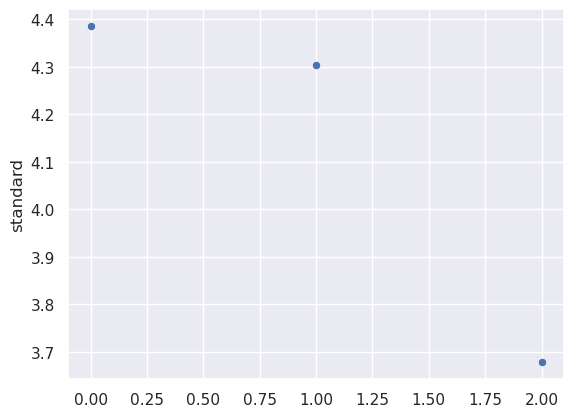

In [38]:
sns.scatterplot(x = np.arange(3), y = df1.standard)

## Einschub:  Lügen mit Statistik

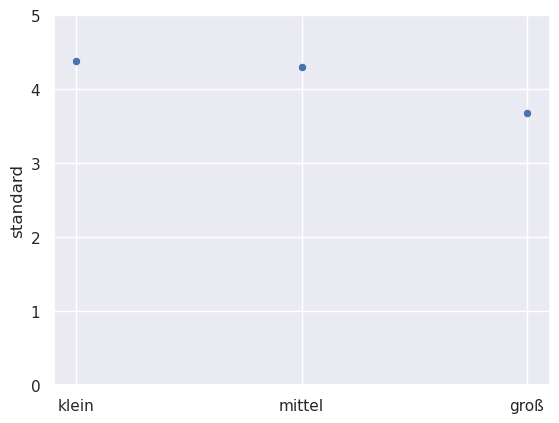

In [51]:
ax = sns.scatterplot(x=['klein', 'mittel', 'groß'], y=df1.standard)
ax.set_ylim(0,5);

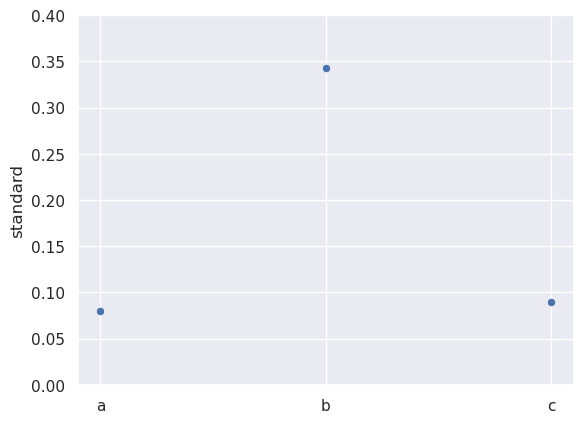

In [52]:
df2 = pd.DataFrame()
df2['standard'] = [a.std(), b.std(), c.std()]
ax = sns.scatterplot(x=['a', 'b', 'c'], y = df2.standard)
ax.set_ylim((0, 0.4));

Alternativen zum Levene-Test

* Bartlett-Test `stats.bartlett` (wenn völlig klar ist, dass die Daten normalverteilt sind)
* Brown-Forsyth-Test `stats.levene` mit `center=trimmed` (ähnlich`zum Levene-Test)
* Fligner-Test `stats.fligner` (nicht-parametrisch)

# Alexander-Govern-Test

Wenn die Daten heteroskedastisch, aber normalverteilt sind, dann rechnet man einen Alexander-Govern-Test

In [54]:
stats.alexandergovern(a, b, c)

AlexanderGovernResult(statistic=1.179163509321826, pvalue=0.5545591780284402)

In [55]:
stats.alexandergovern(small_dose, medium_dose, large_dose)

AlexanderGovernResult(statistic=56.82538049315831, pvalue=4.57641509985116e-13)

# Post-hoc Analyse

* Der t-Test kann nur gerechnet werden, wenn die Varianzen der zu vergleichenden Datensätze übereinstimmen
* Im heteroskedastischen Fall stimmt das nicht
* Man rechnet dann einen Welch-Test
* In scipy ist der Welch-Test wie folgt implementiert

In [56]:
stats.ttest_ind(a, b, equal_var=False)

TtestResult(statistic=-0.4600231174261142, pvalue=0.6553699947302372, df=9.968429307411702)

* Problem:  Arbeitet nicht mit `MultiComparison` zusammen

In [58]:
# unser erstes Programm

def welch(x, y):
    return stats.ttest_ind(x, y, equal_var=False)

In [59]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [ ]:
muc = MultiComparison()